# House Sales in King County, USA (Correlation Analysis)

Good morning, Good afternoon or Good night! This notebook aims to discover possible correlations between variables and to investigate what else can affect the final price of any house in the database. Any tip, or suggestion I am open to receive. Thanks!

#### Loading Libraries...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context("paper")
sns.set_palette(sns.color_palette("mako"))

#### Starting analysis!

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Let's make some variable counts.

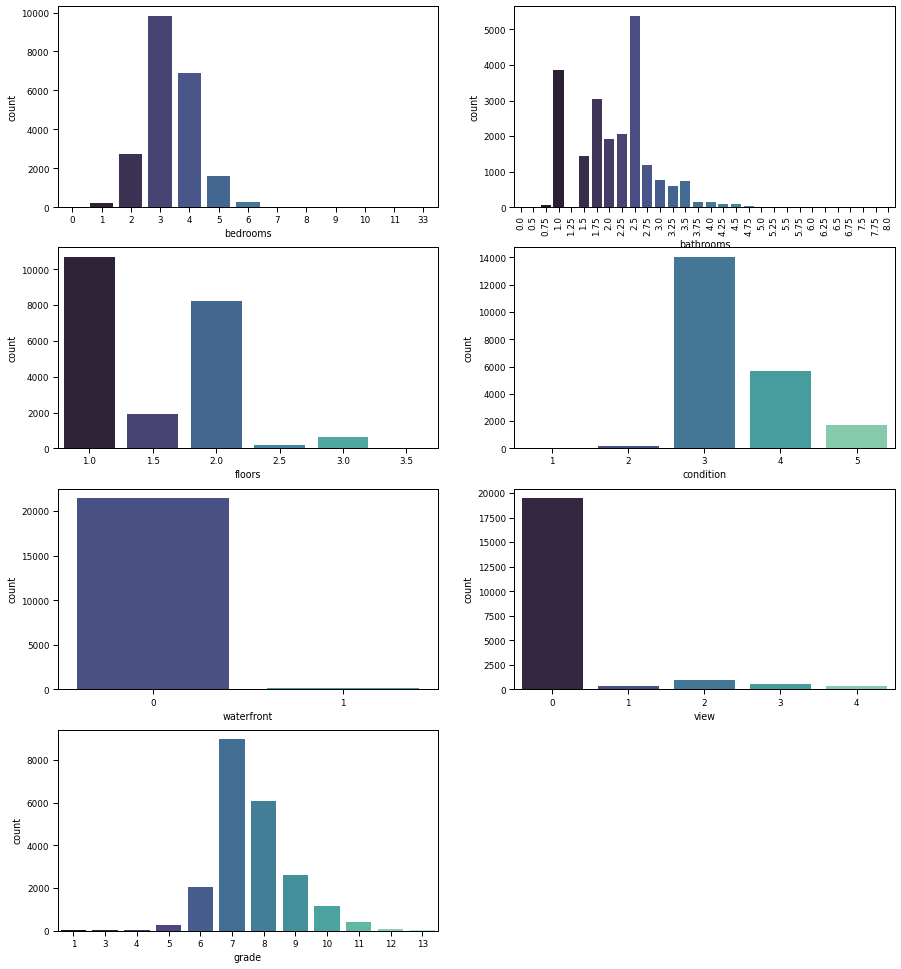

In [3]:
plt.rcParams['figure.figsize'] = [15, 17]

fig, _ = plt.subplots(4,2)

sns.countplot(x='bedrooms',
              data=df,
              ax=_[0][0],
              palette='mako')

sns.countplot(x='bathrooms',
              data=df,
              ax=_[0][1],
              palette='mako')

_[0][1].tick_params('x', labelrotation=90)

sns.countplot(x='floors',
              data=df,
              ax=_[1][0],
              palette='mako')

sns.countplot(x='condition',
              data=df,
              ax=_[1][1],
              palette='mako')

sns.countplot(x='waterfront',
              data=df,
              ax=_[2][0],
              palette='mako')

sns.countplot(x='view',
              data=df,
              ax=_[2][1],
              palette='mako')

sns.countplot(x='grade',
              data=df,
              ax=_[3][0],
              palette='mako')

_[3][1].set_visible(False)

plt.show()

<ul>
    <li> Most houses have about 3 to 4 bedrooms. </li>
    <li> Most houses have 1 or 2.5 bathrooms. </li>
    <li> Most houses have 1 floor. </li>
    <li> Condition 3 homes are prevalent. </li>
    <li> Most houses don't have a waterfront. </li>
    <li> Most houses have a 7-8 grade. </li>
</ul>

#### In which locations the average house price is higher?

First, let's view the database columns. Which columns could we use to find the answer?

The columns containing values referring to location are: <b> zipcode, lat (latitude) and long (longitude).</b> Let's use zipcode to find the answer.

In [4]:
print(f'There are {len(df.zipcode.unique())} zipcodes!')

There are 70 zipcodes!


In [5]:
mean_price_by_zip = df.groupby('zipcode').price.mean().sort_values(ascending=False).reset_index()
mean_price_by_zip.columns = ['zipcode', 'mean_price']

In [6]:
most_expensive_zips = mean_price_by_zip[0:5]['zipcode'].astype('str').unique()

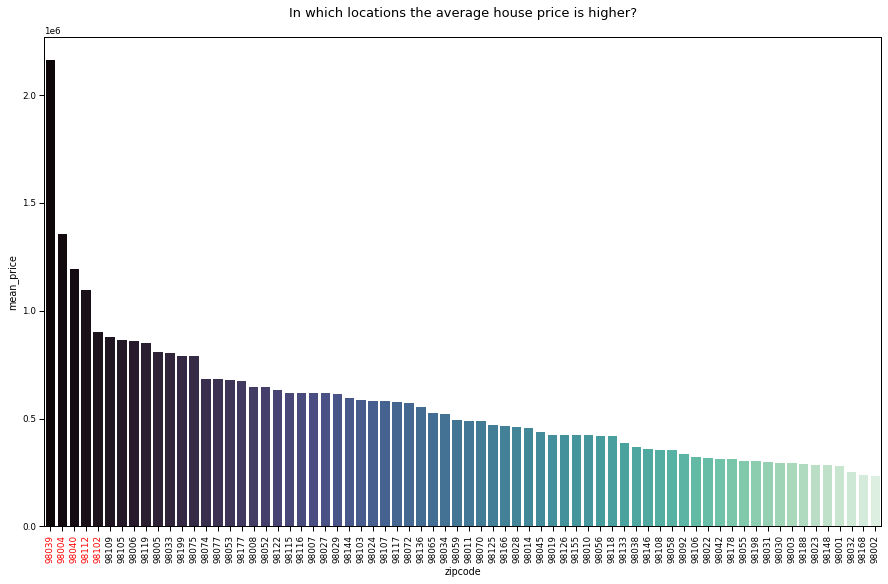

In [7]:
plt.rcParams['figure.figsize'] = [15, 9]

_ = sns.barplot(x='zipcode',
                y='mean_price',
                data=mean_price_by_zip,
                order=mean_price_by_zip.zipcode,
                palette='mako')

plt.xticks(rotation=90)

for tick in _.get_xticklabels():
    if tick.get_text() in most_expensive_zips: tick.set_color('red')

plt.title('In which locations the average house price is higher?',
          fontdict={'fontsize':13},
          pad=20)

plt.show()

#### What features most affect the price of the houses?

Agora vamos plotar uma correlação utilizando como base o Preço. O motivo de fazer isso é encontrar as características que mais afetam o preço final de uma casa.

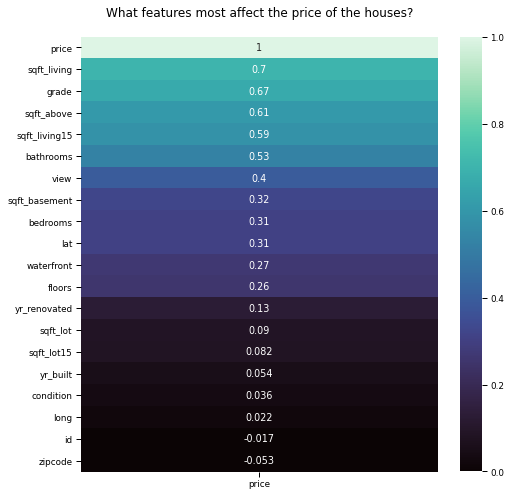

In [8]:
plt.rcParams['figure.figsize'] = [8, 8]

_ = sns.heatmap(df.corr()[['price']]
                .sort_values(by='price', ascending=False),
                vmin=0,
                vmax=1,
                annot=True,
                cmap='mako');

_.set_title('What features most affect the price of the houses?',
            fontdict={'fontsize':12},
            pad=20);

plt.show()

Features that most affect:
<ul>
    <li> sqft_living </li>
    <li> grade </li>
    <li> sqft_above </li>
    <li> bathrooms </li>
</ul>

#### What characteristics do the most expensive houses usually have?

I believe that the best way to do this is through linear regressions with the variables that most affect the final price of the house. Let's make plots of each variable for the price!

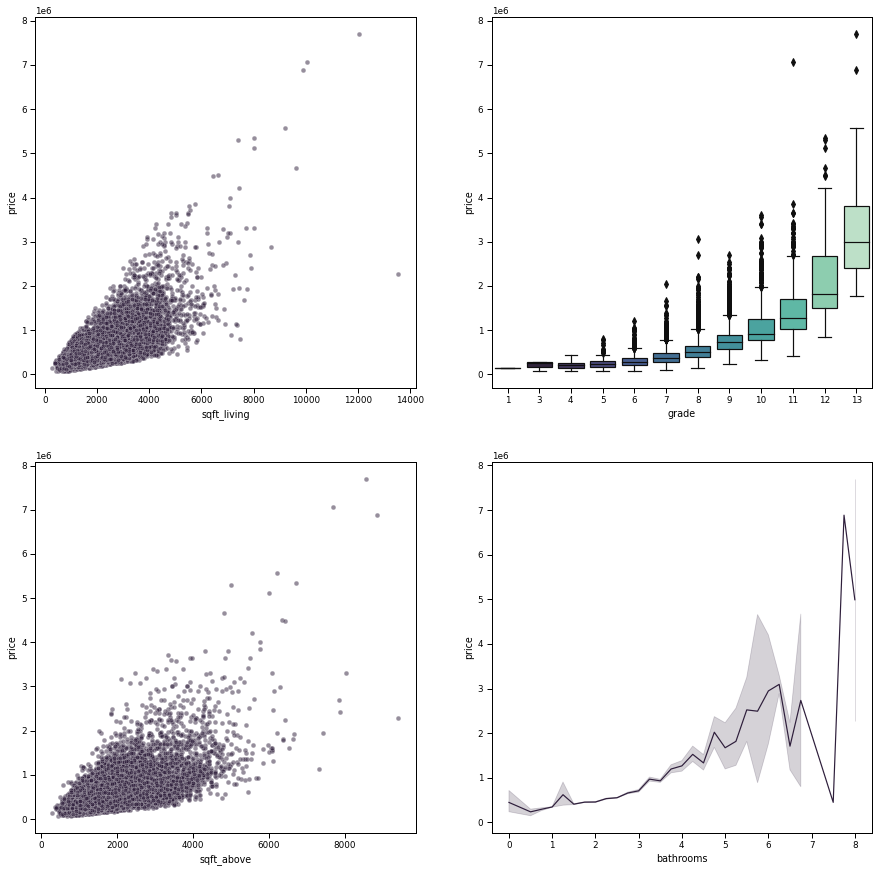

In [9]:
plt.rcParams['figure.figsize'] = [15, 15]

fig, _ = plt.subplots(2,2)

sns.scatterplot(x='sqft_living',
                y='price',
                data=df,
                alpha=0.5,
                ax=_[0][0])

sns.boxplot(x='grade',
            y='price',
            data=df,
            ax=_[0][1],
            palette='mako')

sns.scatterplot(x='sqft_above',
                y='price',
                data=df,
                alpha=0.5,
                ax=_[1][0])

sns.lineplot(x='bathrooms',
             y='price',
             data=df,
             ax=_[1][1],
             palette='mako')

plt.show()

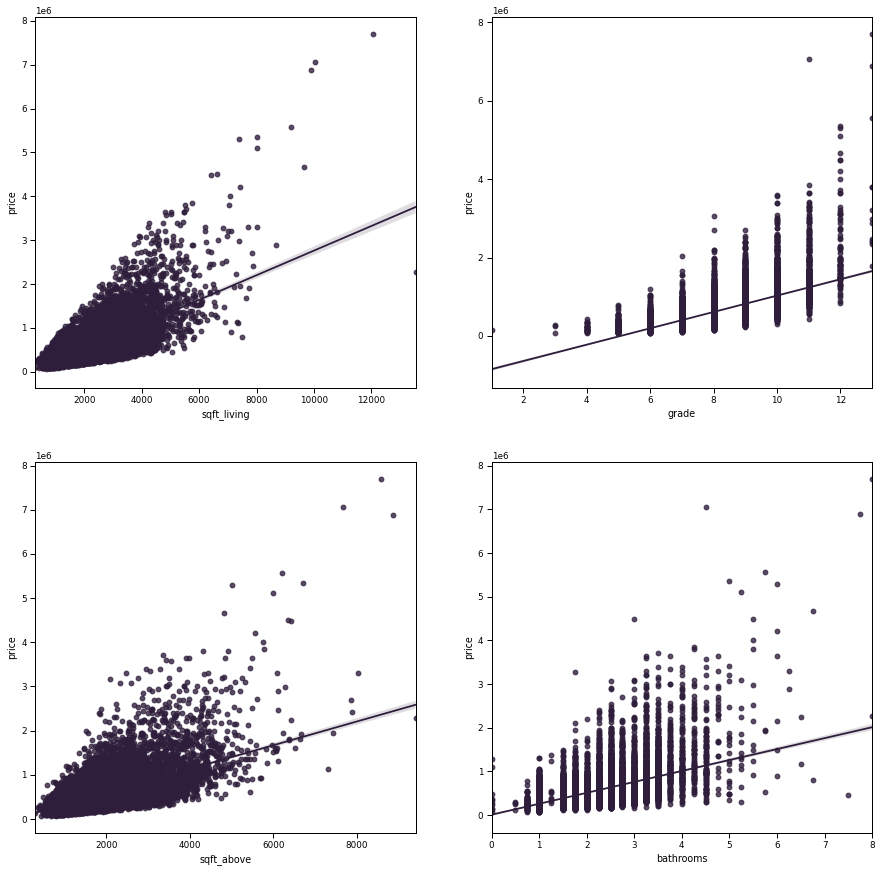

In [10]:
fig, _ = plt.subplots(2,2)

sns.regplot(x='sqft_living',
            y='price',
            data=df,
            ax=_[0][0])

sns.regplot(x='grade',
            y='price',
            data=df,
            ax=_[0][1])

sns.regplot(x='sqft_above',
            y='price',
            data=df,
            ax=_[1][0])

sns.regplot(x='bathrooms',
            y='price',
            data=df,
            ax=_[1][1])

plt.show()

As the value of these variables increases, the final value of the house also increases. Thus, we can conclude that the final value of the house is defined by multiple variables together.

More expensive houses generally have:
<ul>
    <li> greater sqft_living </li>
    <li> big grade </li>
    <li> big sqft_above </li>
    <li> more bathrooms </li>
</ul>

#### Do houses located in the most expensive zipcodes generally have the features that make houses more expensive?

In [11]:
df_most_expensive = df[df.zipcode.isin(most_expensive_zips)]

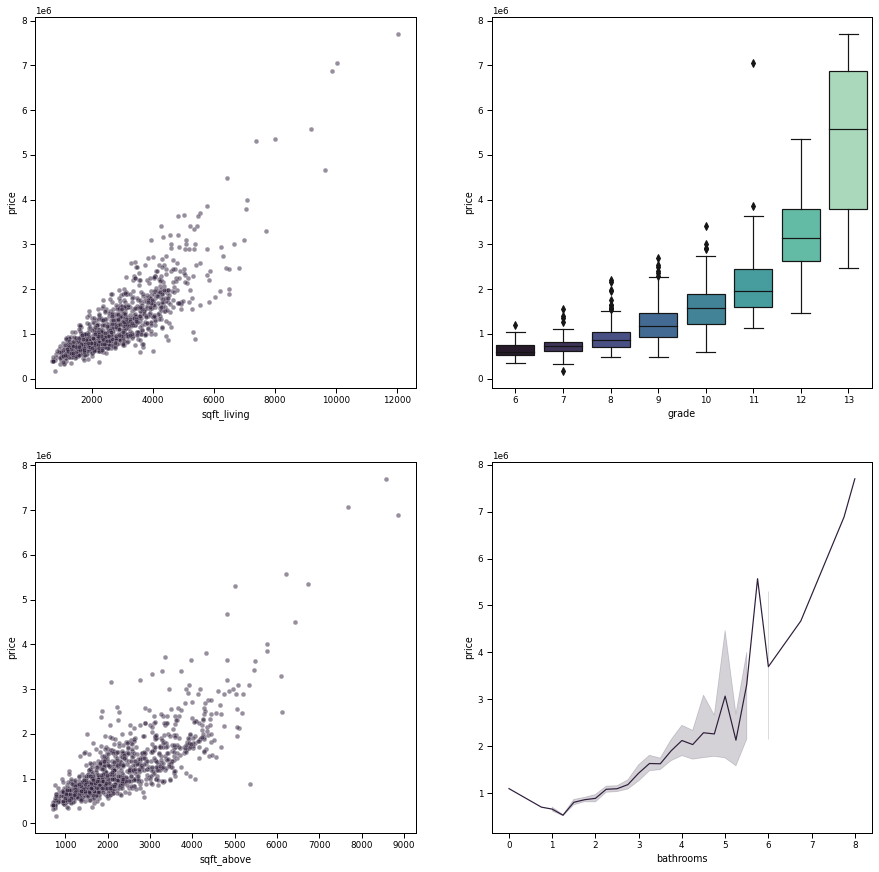

In [12]:
fig, _ = plt.subplots(2,2)

sns.scatterplot(x='sqft_living',
                y='price',
                data=df_most_expensive,
                alpha=0.5,
                ax=_[0][0])

sns.boxplot(x='grade',
            y='price',
            data=df_most_expensive,
            ax=_[0][1],
            palette='mako')

sns.scatterplot(x='sqft_above',
                y='price',
                data=df_most_expensive,
                alpha=0.5,
                ax=_[1][0])

sns.lineplot(x='bathrooms',
             y='price',
             data=df_most_expensive,
             ax=_[1][1],
             palette='mako')

plt.show()

YES! They usually have greater values in the variables. Lets plot this relations more! 

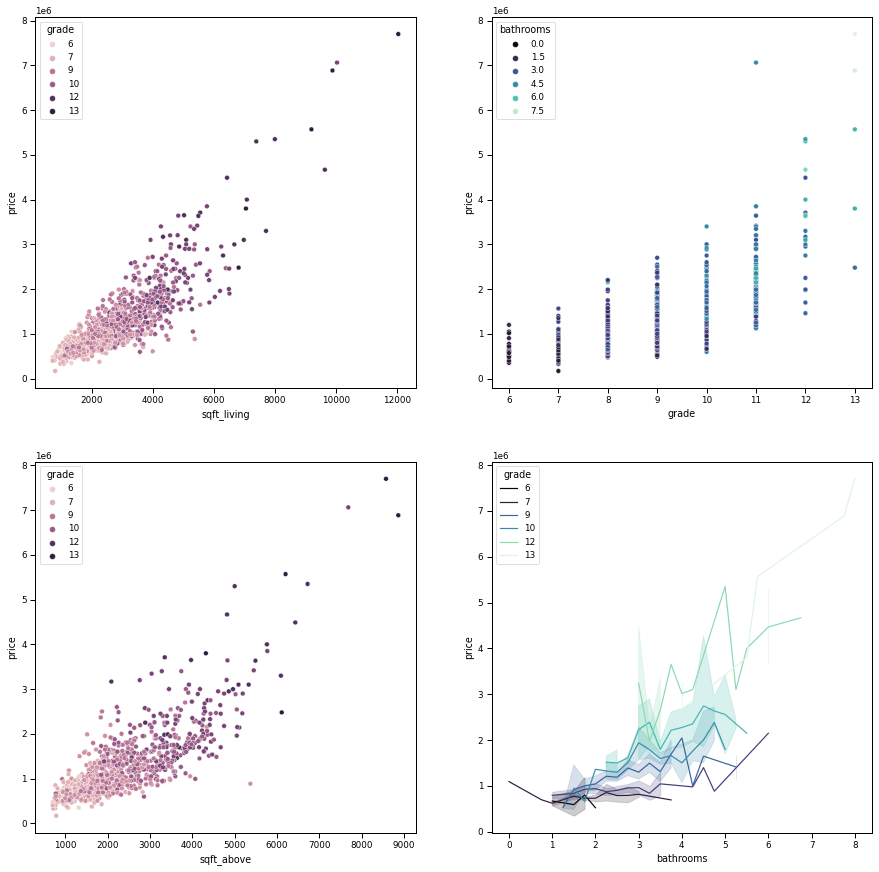

In [15]:
fig, _ = plt.subplots(2,2)

sns.scatterplot(x='sqft_living',
                y='price',
                hue='grade',
                data=df_most_expensive,
                ax=_[0][0])

sns.scatterplot(x='grade',
                y='price',
                hue='bathrooms',
                data=df_most_expensive,
                ax=_[0][1],
                palette='mako')

sns.scatterplot(x='sqft_above',
                y='price',
                hue='grade',
                data=df_most_expensive,
                ax=_[1][0])

sns.lineplot(x='bathrooms',
             y='price',
             hue='grade',
             data=df_most_expensive,
             ax=_[1][1],
             palette='mako')

plt.show()

<ul>
    <li> Higher-rated homes have larger sqft_living, larger sqft_above, and more bathrooms. </li>
    <li> The inverse is the same! Houses with more bathrooms usually have higher grades. </li>
</ul>